# EHT FateID Plotting
# Jun Ying

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.24.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.8


In [4]:
adata = sc.read('./write/c25Leuko_wt_filtered.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 2305 × 9468
    obs: 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch', 'n_counts', 'phase', 'S_score', 'G2M_score', 'EGFP', 'FishID', 'Treatment', 'RFP', 'db_scores', 'FishID_new', 'CellID', 'Cell', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'time', 'morphine', 'AV', 'inhib', 'so.far.ident.subtypes', 'so.far.ident', 'RNA_snn_res.4', 'seurat_clusters', 'work.ident', 'fibro.subtypes', 'is.inhib', 'split.inhib', 'zoom.ident', 'zoom.subtypes', 'plot.ident', 'CM.ident', 'paper.ident', 'RNA_snn_res.2', 'RNA_snn_res.3', 'RNA_snn_res.3.5', 'work.ident2', 'work.ide

In [6]:
adata.obs['CT_new3'] = adata.obs['EHT'].cat.rename_categories({
    'EHT5':'T-cells 2',
    'EHT6':'Macrophage 2'}
)

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


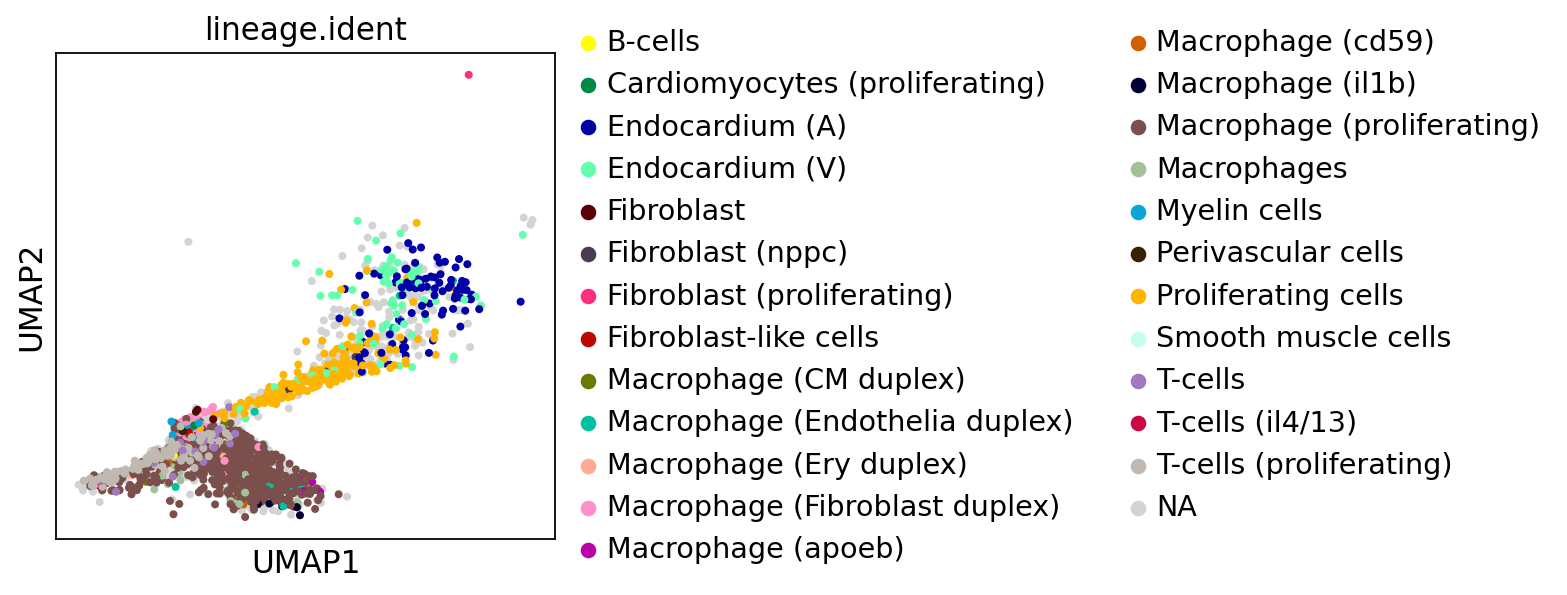

In [7]:
sc.pl.umap(adata,color='lineage.ident')

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


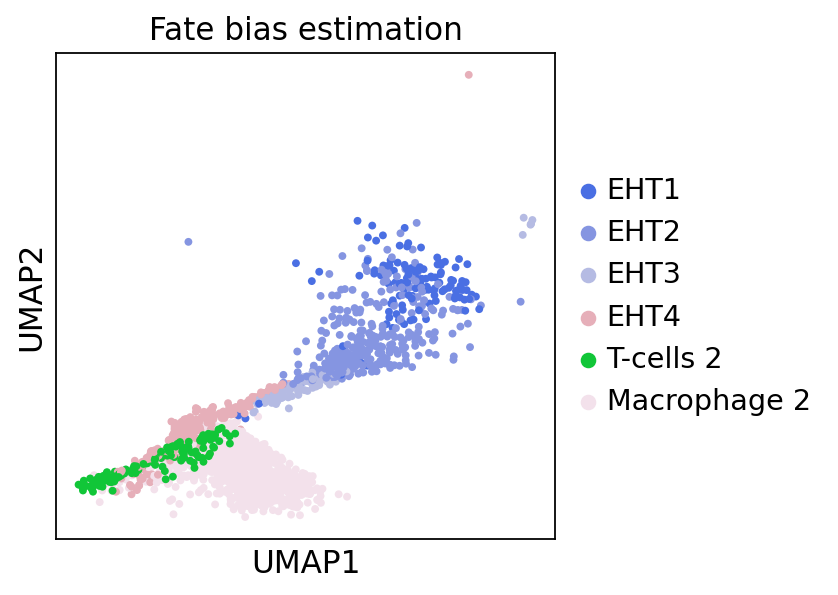

In [8]:
sc.pl.umap(adata,color='CT_new3',title='Fate bias estimation',save='_fatebias_ct.pdf',size=50)

In [25]:
E = pd.read_csv('./Files/Entropy_c25Leuko_wt_fb_hvg.csv',index_col=0)

In [26]:
adata.obs['E']=E['E']

In [32]:
adata.obs['E2']=E['E']*E['E']

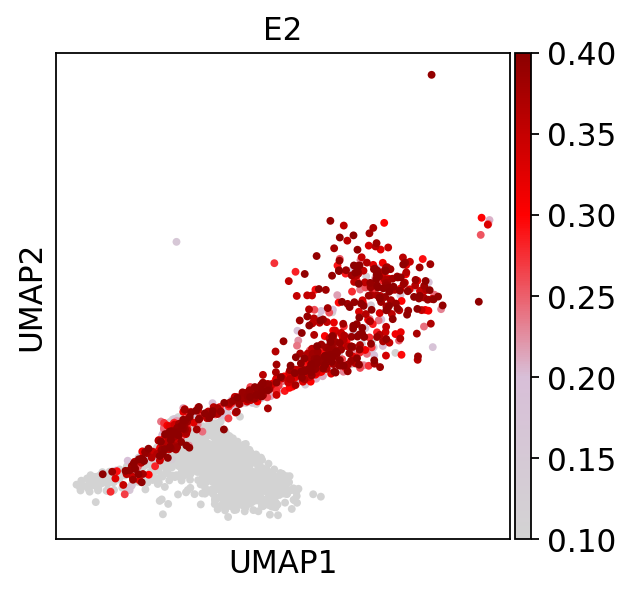

In [42]:
sc.pl.umap(adata,color='E2',cmap=cmap,size=50,vmin=0.1,vmax=0.4,
           save='_fb_E2.pdf'
          )

# Old(fb)

In [9]:
fb = pd.read_csv('./Files/c25Leuko_wt_fb_hvg.csv',index_col=0)

In [10]:
adata.obs['Fate_bias_T_2_hvg']=fb['t5']
adata.obs['Fate_bias_Macro_2_hvg']=fb['t6']

In [16]:
adata.obs['Fate_bias_prol.T']=fb['t5']
adata.obs['Fate_bias_prol.Macro']=fb['t6']

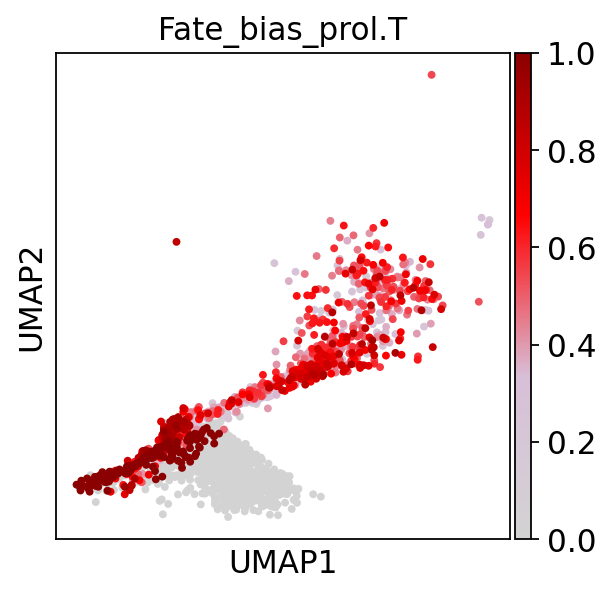

In [17]:
sc.pl.umap(adata,color='Fate_bias_prol.T',cmap=cmap,size=50,
           save='_fatebias_prol.T_hvg.pdf'
          )

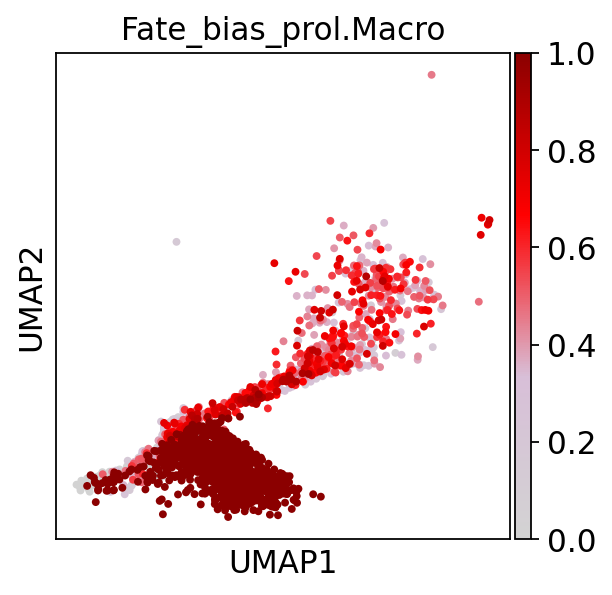

In [18]:
sc.pl.umap(adata,color='Fate_bias_prol.Macro',cmap=cmap,size=50,
          save='_fatebias_prol.Macro_hvg.pdf',)

In [ ]:
sc.pl.umap(adata,color='Fate_bias_prol.Macro',cmap=cmap,size=50,
          save='_fatebias_prol.Macro_hvg.pdf',)